In [1]:
import os

import pandas as pd
import lightgbm as lgb
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt
import time

from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn import svm
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [2]:
df = pd.read_csv('./preprocessed_apartment.csv')
df.head()

,city,district,dong,apartment,m2,price,floor,pre_m2,moving_date,num_people,people_by_m2,price_by_m2,price_by_pre_m2,year,month
0,8,1,1156,1504,196.21,450000.0,13.0,211.23,1976.06,480.0,120.0,7582.0,7043.0,2018,12
1,8,1,1706,4942,202.58,450000.0,5.0,252.31,2010.07,19.0,1.0,7343.0,5896.0,2018,12
2,8,1,1156,9746,139.83,320000.0,7.0,165.29,1982.04,1924.0,168.0,7565.0,6400.0,2018,12
3,8,1,393,15322,191.04,315000.0,2.0,219.22,1983.12,1204.0,84.0,5451.0,4750.0,2018,12
4,8,1,1156,1509,144.20,304000.0,10.0,158.68,1979.05,560.0,168.0,6969.0,6333.0,2018,12


In [3]:
df.shape

(6174900, 15)

In [4]:
df = df.sample(n=1000)
print(df.shape)
df.head()

(1000, 15)


,city,district,dong,apartment,m2,price,floor,pre_m2,moving_date,num_people,people_by_m2,price_by_m2,price_by_pre_m2,year,month
4652760,7,82,184,14361,84.98,16000.0,17.0,109.09,1992.09,211.0,211.0,622.0,485.0,2018,5
4136995,5,60,1086,6242,50.85,13500.0,4.0,66.12,1985.12,545.0,160.0,878.0,675.0,2016,12
487138,8,61,334,13943,59.89,31500.0,20.0,76.03,2000.05,1542.0,200.0,1739.0,1370.0,2015,3
181494,8,5,1922,14338,69.33,37600.0,4.0,86.67,2005.05,98.0,31.0,1793.0,1434.0,2017,6
2323564,1,148,489,15345,84.99,58250.0,1.0,109.56,2010.05,885.0,21.0,2266.0,1758.0,2016,12


In [5]:
y = df['price']
del df['price']

In [6]:
x_train, x_test,y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=0)

# 5 ML models

In [7]:
gboost = GradientBoostingRegressor(random_state=0)
xgboost = xgb.XGBRegressor(random_state=0)
lightgbm = lgb.LGBMRegressor(random_state=0)
lasso = Lasso(alpha=1.0, random_state=0)
svm = svm.SVC(kernel='rbf', C=1, gamma=0.1, random_state=0)

models = [{'model':xgboost, 'name':'XGBoost'},
          {'model':gboost, 'name': 'GradientBoosting'},
          {'model':lightgbm, 'name':'LightGBM'},
          {'model':lasso, 'name': 'Lasso'},
          {'model':svm, 'name': 'SVM'}]

In [8]:
def predict_each(models, x, y, sub_x, sub_y):
    for m in models :
        RMSE = []
        
        for m in models:
            start = time.time()
            m['model'].fit(x.values, y)
            predictions = m['model'].predict(sub_x.values) 
            result = sqrt(mean_squared_error(sub_y, predictions))
            end = round((time.time() - start), 4)
            RMSE.append(m['name'])
            RMSE.append(round(result))
            RMSE.append(end)
    return RMSE

In [9]:
y_pred = predict_each(models, x_train, y_train, x_test, y_test)
y_pred

C:\ProgramData\Anaconda3\envs\p36\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\envs\p36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\envs\p36\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\envs\p36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData

['XGBoost',
 6648,
 0.1358,
 'GradientBoosting',
 6217,
 0.07,
 'LightGBM',
 8835,
 0.1311,
 'Lasso',
 7152,
 0.03,
 'SVM',
 24399,
 0.7192]

# Keras

In [10]:
model = Sequential()
model.add(Dense(140, input_dim=14, activation='relu'))
model.add(Dense(35, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1))

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
model.compile(loss='mean_squared_error',
             optimizer='adam',
             metrics=['accuracy'])

In [12]:
# 모델 저장 폴더 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
# 모델 저장 조건 설정
modelpath = MODEL_DIR + '{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
# loss는 train loss고 val_loss는 validation loss임 / acc도 마찬가지

In [13]:
start = time.time()
history = model.fit(x_train, y_train, validation_split=0.4, epochs=100, batch_size=1000, callbacks=[checkpointer])

Instructions for updating:
Use tf.cast instead.
Train on 420 samples, validate on 280 samples
Epoch 1/100
420/420 [==============================] - 28s 67ms/step - loss: 912911424.0000 - acc: 0.0000e+00 - val_loss: 984458368.0000 - val_acc: 0.0000e+00

Epoch 00001: val_loss improved from inf to 984458368.00000, saving model to ./model/01-984458368.0000.hdf5
Epoch 2/100
420/420 [==============================] - 0s 21us/step - loss: 898925120.0000 - acc: 0.0000e+00 - val_loss: 971725824.0000 - val_acc: 0.0000e+00

Epoch 00002: val_loss improved from 984458368.00000 to 971725824.00000, saving model to ./model/02-971725824.0000.hdf5
Epoch 3/100
420/420 [==============================] - 0s 21us/step - loss: 885418368.0000 - acc: 0.0000e+00 - val_loss: 959218240.0000 - val_acc: 0.0000e+00

Epoch 00003: val_loss improved from 971725824.00000 to 959218240.00000, saving model to ./model/03-959218240.0000.hdf5
Epoch 4/100
420/420 [==============================] - 0s 24us/step - loss: 8722622


Epoch 00029: val_loss improved from 657944960.00000 to 645029248.00000, saving model to ./model/29-645029248.0000.hdf5
Epoch 30/100
420/420 [==============================] - 0s 24us/step - loss: 545781376.0000 - acc: 0.0000e+00 - val_loss: 632164672.0000 - val_acc: 0.0000e+00

Epoch 00030: val_loss improved from 645029248.00000 to 632164672.00000, saving model to ./model/30-632164672.0000.hdf5
Epoch 31/100
420/420 [==============================] - 0s 24us/step - loss: 532713760.0000 - acc: 0.0000e+00 - val_loss: 619389824.0000 - val_acc: 0.0000e+00

Epoch 00031: val_loss improved from 632164672.00000 to 619389824.00000, saving model to ./model/31-619389824.0000.hdf5
Epoch 32/100
420/420 [==============================] - 0s 21us/step - loss: 519767136.0000 - acc: 0.0000e+00 - val_loss: 606729472.0000 - val_acc: 0.0000e+00

Epoch 00032: val_loss improved from 619389824.00000 to 606729472.00000, saving model to ./model/32-606729472.0000.hdf5
Epoch 33/100
420/420 [=====================

Epoch 59/100
420/420 [==============================] - 0s 14us/step - loss: 345060000.0000 - acc: 0.0000e+00 - val_loss: 423967488.0000 - val_acc: 0.0000e+00

Epoch 00059: val_loss improved from 426896544.00000 to 423967488.00000, saving model to ./model/59-423967488.0000.hdf5
Epoch 60/100
420/420 [==============================] - 0s 12us/step - loss: 342776224.0000 - acc: 0.0000e+00 - val_loss: 420863712.0000 - val_acc: 0.0000e+00

Epoch 00060: val_loss improved from 423967488.00000 to 420863712.00000, saving model to ./model/60-420863712.0000.hdf5
Epoch 61/100
420/420 [==============================] - 0s 12us/step - loss: 340220544.0000 - acc: 0.0000e+00 - val_loss: 417568992.0000 - val_acc: 0.0000e+00

Epoch 00061: val_loss improved from 420863712.00000 to 417568992.00000, saving model to ./model/61-417568992.0000.hdf5
Epoch 62/100
420/420 [==============================] - 0s 14us/step - loss: 337411712.0000 - acc: 0.0000e+00 - val_loss: 414118368.0000 - val_acc: 0.0000e+00

Epo


Epoch 00088: val_loss improved from 332005312.00000 to 329338272.00000, saving model to ./model/88-329338272.0000.hdf5
Epoch 89/100
420/420 [==============================] - 0s 24us/step - loss: 257255872.0000 - acc: 0.0000e+00 - val_loss: 326705088.0000 - val_acc: 0.0000e+00

Epoch 00089: val_loss improved from 329338272.00000 to 326705088.00000, saving model to ./model/89-326705088.0000.hdf5
Epoch 90/100
420/420 [==============================] - 0s 24us/step - loss: 255085360.0000 - acc: 0.0000e+00 - val_loss: 324100544.0000 - val_acc: 0.0000e+00

Epoch 00090: val_loss improved from 326705088.00000 to 324100544.00000, saving model to ./model/90-324100544.0000.hdf5
Epoch 91/100
420/420 [==============================] - 0s 21us/step - loss: 252954256.0000 - acc: 0.0000e+00 - val_loss: 321534848.0000 - val_acc: 0.0000e+00

Epoch 00091: val_loss improved from 324100544.00000 to 321534848.00000, saving model to ./model/91-321534848.0000.hdf5
Epoch 92/100
420/420 [=====================

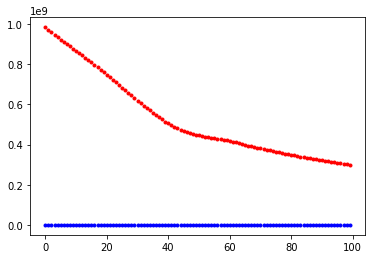

In [14]:
# y_vloss에 테스트셋으로 실험 결과의 오차 값을 저장
y_vloss = history.history['val_loss']

# y_acc에 학습셋으로 측정한 정확도의 값을 저장
y_acc = history.history['acc']

# x값을 지정하고 정확도를 파랑색으로, 오차를 빨강색으로 표시
x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vloss, "o", c="red", markersize=3)
plt.plot(x_len, y_acc, "o", c="blue", markersize=3)

plt.show()

In [15]:
modelPred = model.predict(x_test)
end = time.time() - start
print(round(end,4))
RMSE = sqrt(mean_squared_error(y_test, modelPred))
RMSE

34.0811


19360.431761331343

In [16]:
Y_prediction = modelPred.flatten()
for i in range(10):
    label = y_test.values[i]
    prediction = Y_prediction[i]
    print("실제가격: {:.3f}, 예상가격: {:.3f}".format(label, prediction))

실제가격: 13500.000, 예상가격: 20550.152
실제가격: 33000.000, 예상가격: 33819.777
실제가격: 17043.000, 예상가격: 29606.977
실제가격: 20500.000, 예상가격: 18412.801
실제가격: 55250.000, 예상가격: 29632.857
실제가격: 51900.000, 예상가격: 28612.406
실제가격: 8120.000, 예상가격: 21279.521
실제가격: 2500.000, 예상가격: 16181.153
실제가격: 7300.000, 예상가격: 23539.945
실제가격: 7500.000, 예상가격: 23282.957


Train on 420 samples, validate on 280 samples
Epoch 1/10
420/420 [==============================] - 0s 910us/step - loss: 955407744.0000 - acc: 0.0000e+00 - val_loss: 1034666432.0000 - val_acc: 0.0000e+00

Epoch 00001: val_loss improved from inf to 1034666432.00000, saving model to ./model/01-1034666432.0000.hdf5
Epoch 2/10
420/420 [==============================] - 0s 24us/step - loss: 952777920.0000 - acc: 0.0000e+00 - val_loss: 1032079744.0000 - val_acc: 0.0000e+00

Epoch 00002: val_loss improved from 1034666432.00000 to 1032079744.00000, saving model to ./model/02-1032079744.0000.hdf5
Epoch 3/10
420/420 [==============================] - 0s 21us/step - loss: 949995648.0000 - acc: 0.0000e+00 - val_loss: 1029448640.0000 - val_acc: 0.0000e+00

Epoch 00003: val_loss improved from 1032079744.00000 to 1029448640.00000, saving model to ./model/03-1029448640.0000.hdf5
Epoch 4/10
420/420 [==============================] - 0s 21us/step - loss: 947187520.0000 - acc: 0.0000e+00 - val_loss: 102

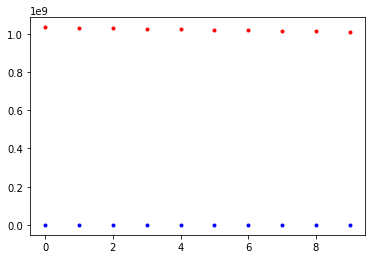

1.8423


33753.11323877499

In [17]:
model = Sequential()
model.add(Dense(140, input_dim=14, activation='relu'))
model.add(Dense(35, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error',
             optimizer='adam',
             metrics=['accuracy'])

# 모델 저장 폴더 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
# 모델 저장 조건 설정
modelpath = MODEL_DIR + '{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
# loss는 train loss고 val_loss는 validation loss임 / acc도 마찬가지

start = time.time()
history = model.fit(x_train, y_train, validation_split=0.4, epochs=10, batch_size=1000, callbacks=[checkpointer])
# y_vloss에 테스트셋으로 실험 결과의 오차 값을 저장
y_vloss = history.history['val_loss']

# y_acc에 학습셋으로 측정한 정확도의 값을 저장
y_acc = history.history['acc']

# x값을 지정하고 정확도를 파랑색으로, 오차를 빨강색으로 표시
x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vloss, "o", c="red", markersize=3)
plt.plot(x_len, y_acc, "o", c="blue", markersize=3)

plt.show()

modelPred = model.predict(x_test)
end = time.time() - start
print(round(end,4))
RMSE = sqrt(mean_squared_error(y_test, modelPred))
RMSE